<!--NAVIGATION-->
< [深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb) | [目录](Index.ipynb) | [深入：支持向量机](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# In Depth: Linear Regression
# 深入：線性回歸

> Just as naive Bayes is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

就像樸素貝葉斯是分類任務(classification) 的入門課，線性回歸模型是回歸任務(regression)的入門課。這種模型因為它能夠快速的訓練擬合以及非常容易解釋而流行。你可能已經了解了線性回歸模型的簡單形式（例如讓一條直線擬合到數據上），但是這樣的模型也能夠擴展到更加複雜的數據上。

## Simple Linear Regression

## 簡單線性回歸

> We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

我們先從最熟悉的線性回歸模型開始，用一條直線擬合數據。一條擬合直線的模型具有下面的數學形式, 其中的$a$通常被稱為*斜率*，而$b$通常被成為*截距*。下面的數據是一些隨機散落在一條斜率(a)為2截距(b)為-5的直線附近的點：

$$
y = ax + b
$$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

> We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

我們可以使用Scikit-Learn的`LinearRegression`評估器來擬合這些數據然後得到一條最佳擬合直線：

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

> The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

數據的斜率和截距可以在模型擬合參數中找到，在Scikit-Learn中總是使用下劃線後綴來表示。這里相關的參數是`coef_`和`intercept_`：正如我們所料，可以看到結果非常接近預期。

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

> The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

`LinearRegression`評估器能做的遠不止於此，除了簡單的直線擬合外，它還能處理多維線性模型的形式，這裡有多個$x$值。幾何上，這等同於在三維空間間使用一個平面擬合數據，或在更高維空間中使用超平面擬合數據。

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$


> The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

這樣的回歸具有多維的本質，因此令它們比較難以可視化，但我們可以構造一些樣例數據來查看這樣的擬合，這裡使用了NumPy的矩陣乘法操作：

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

> Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.
 
這裡 $y$ 值是由三個隨機 $x$ 值構建的，而線性回歸恢復了用來構建數據的斜率。使用這種方法，我們可以使用單個`LinearRegression`評估器擬合直線、平面或超平面到數據上。目前為止這種方法看起來都限制在變量之間的線性關聯上，但是實際上它還能完成更多的工作。

## Example

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('input/regression_data.xlsx')
df.head()

In [ ]:
df.plot.scatter("x", "y")

In [ ]:
# 擬合數據得到一條最佳直線
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1].values # converting to array
y = df.iloc[:,-1].values 

model = LinearRegression()
model.fit(X,y)

# intercept , slope
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [ ]:
# prediction
y_pred_sk = model.predict(X)
x_test = np.array([3]).reshape(-1,1)
model.predict(x_test)

plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],y_pred_sk,'go',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],y_pred_sk,'g')
plt.plot(df['x'],y_pred_sk,'go')

plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Example Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

data=pd.read_csv("input/Salary_Data.csv")
data.head()
# plt.scatter(data["YearsExperience"],data["Salary"])

In [ ]:
# LinearRegression 擬合數據得到一條最佳直線
from sklearn.linear_model import LinearRegression
X = data.iloc[:,:-1].values # converting to array
Y = data.iloc[:,-1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model=LinearRegression()
model.fit(X,Y)

In [ ]:
# 進行預測標籤
X_test=X_test.reshape(-1,1)
Y_predicted=model.predict(X_test)
Y_predicted

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,model.predict(X_train),color='red')
plt.title("Linear Regression")
plt.xlabel('No of Years')
plt.ylabel('Salary')

### Example
Process:
1. Import the model you want to use
2. Create an instance of that model and set any hyperparameters you want
3. Fit the model to the data, this computes the parameters of the model using machine learning
4. Predict new information using the model

默認情況下，LinearRegression 模型將擬合 y 截距，但由於我們不想做出該假設，因此我們明確地傳遞 fit_intercept=True。 設定為預先設置而不是讓它們從數據中學習。

In [ ]:
from pandas import read_csv

data = read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")
data.head()
#data.plot.scatter("x", "y")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(data[["x"]], data["y"])

print("Model gradient: ", model.coef_[0])   #陡度
print("Model intercept:", model.intercept_) #截距

# 取得方程式 y = 1.97x − 4.90

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

x_fit = pd.DataFrame({"x": [data["x"].min(), data["x"].max()]})
y_pred = model.predict(x_fit)

fig, ax = plt.subplots()
data.plot.scatter("x", "y", ax=ax)
ax.plot(x_fit["x"], y_pred, linestyle=":")

### Example - 體位身高與體重的分布

In [ ]:
import numpy as np
import pandas as pd  #csv
import matplotlib.pyplot as plt

dt = pd.read_csv("input/500_Person_Gender_Height_Weight_Index.csv")
dt.head()

In [ ]:
bmi_health_3 = dt[dt["Index"] == 3]   # made Frame
#bmi_health_3 = dt["Index"] == 3     # None Frame
bmi_health_3.head()

In [ ]:
plt.plot(bmi_health_3['Height'], bmi_health_3['Weight'], "b.")
plt.show()

## Basis Function Regression

## 基本函數回歸

> One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model: and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

將線性回歸應用在變量之間的非線性關係的一個技巧是，將數據通過*基本函數*進行轉換。我們在[超參數和模型驗證](05.03-Hyperparameters-and-Model-Validation.ipynb)和[特徵工程](05.04-Feature-Engineering.ipynb)中已經看到過多項式回歸`PolynomialRegression`管道操作中已經看到這個技巧的例子。這個方法是將一維的輸入數據使用多維線性模型來建立$x_1, x_2, x_3$等。即我們令$x_n = f_n(x)$其中的$f_n()$是用來轉換數據的函數。

> For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

例如，如果令$f_n(x) = x^n$，我們的模型就會變成一個多項式回歸：注意這裡模型仍然是*線性的*，線性的意思是指模型中的斜率$a_n$沒有互相進行乘法或除法操作。這裡起作用的是我們將一維的$x$值投射到了更高的維度上，這樣我們的線性模型就能擬合$x$和$y$之間更加複雜的聯繫。

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

### 多元回歸(multiple regression)
當資料的欄位不只一個時建立的線性回歸就稱為多元回歸

$$
y = w_1* x 1 + w_2* x 2 + \cdots + w_n*x_n + b
$$
* y : 預測值
* x1 ~ xn : 每個欄位的值
* w1 ~ wn : 每個欄位的斜率
* b : 基底

w1~wn是每個欄位(項度)的斜率，也可以看成是每個欄位對於預測輸出的重要性
* 遇到非線性資料預測會失準
* 會受到離異值的影響

### Polynomial basis functions 多項式基本函數

> This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

這種多項式投射如此有用，所以Scikit-Learn內建了實現它的方法，就是`PolynomialFeatures`轉換：

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

> We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression. As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

我們看到上例中使用這個轉換器我們對每個值求冪將一維數組變成了三維數組。這個新的高維數據表示能應用到線性回歸中。正如我們在[特徵工程](05.04-Feature-Engineering.ipynb)中看到的，實現這個任務的最優雅犯法是使用管道。這裡我們創建一個7階的多項式模型，使得我們的線性模型能夠異常良好的擬合到這個非線性數據上：

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

> With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

有了這樣的轉換方式，我們可以使用線性模型來擬合複雜得多的$x$和$y$的關係。例如像下面的帶有噪音的正弦波：

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Gaussian basis functions 高斯基本函數

> Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

當然還有其他可用的基本函數。例如可以通過高斯函數疊加而不是多項式疊加來擬合模型。結果可能如下圖所示：

![](figures/05.06-gaussian-basis.png)
[附录中生成图像的代码](#Gaussian-Basis)

> The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

上圖中陰影部分是基本函數的覆蓋範圍，當這些陰影疊加在一起時就會產生上面光滑的擬合曲線。 Scikit-Learn中沒有內建這些高斯基本函數，但我們可以寫一個自定義的轉換器來構造它們，Scikit-Learn的轉換器是使用Python類實現的；閱讀Scikit-Learn的源代碼是理解它們創建的好方法：

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """對一維數據進行均勻分佈高斯轉換"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # 沿著數據范圍創建均勻分佈的N個中心點
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization

## 正則化

> The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

將基本函數引入線性回歸令模型更加靈活，但是它很容易導致過擬合（參見[超參數和模型驗證](05.03-Hyperparameters-and-Model-Validation.ipynb)）。如果選擇太多高斯函數，產生的結果就不太可靠：

In [ ]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

> With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:The lower panel of this figure shows the amplitude of the basis function at each location.This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.Such a penalty is known as *regularization*, and comes in several forms.

投射到30維的空間上，該模型太過於靈活以至於當處於間隔距離較大的點之間的位置時候會擬合成很極端的數據值。我們可以將高斯函數的係數也繪製在圖表中，就可以看到原因：下面的圖展示了基本函數在每個位置的振幅。這是當使用基本函數疊加的典型過擬合情況：鄰近的基本函數的係數互相疊加到波峰和波谷。這種情形是錯誤的，如果我們能在模型中限制這樣的尖刺能解決這個問題，這樣被成為*正則化*。

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

### Regularization - penalty parameter, P

###  正規化 - 懲罰參數
常見的懲罰係數有兩種(分別對應到 Ridge & Lasso)，效果類似。懲罰係數將會限制回歸係數的大小，除非該變數可以使誤差平方和(SSE)降低對應水準，該特徵係數才會上升。以下就來進一步介紹兩種最常見的正規化回歸法。正規化回歸的目標函數與 OLS 回歸類似，但多了一個懲罰參數 (Penalty parameter)

- Ridge：如果我們的數據集少或特徵和特徵之間的相關性很小，那麼我們應該選擇 Ridge 模型，他只會將係數逼近到接近零（但不會真的是0）
- 若數據少情況下使用 Lassalle，那麼少數特徵的權重將變為 0，即會導致數據丟失，最終削弱我們的模型。

$$
minnimize (SSE + P)
$$

### Ridge regression ($L_2$ Regularization) 嶺回歸（$L_2$正則化）

> The most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*. This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be where $\alpha$ is a free parameter that controls the strength of the penalty. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

最常用的正則化方式：*嶺回歸* ($L_2$*)* 也被叫*Tikhonov正則化*。這個過程通過對模型係數的平方和（2-範數）進行乘法，也就是會對係數做二階懲罰(L2) ；在這個例子中，其中$\alpha$是控制乘法力度的參數。這類的懲罰模型內建在Scikit-Learn中`Ridge`評估器中：
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

> The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

$\alpha$參數是用來控制模型複雜度的關鍵開關。極限情況$\alpha \to 0$時，恢復到標準線性回歸結果；極限情況$\alpha \to \infty$時，所有模型的響應都會被壓縮。嶺回歸的一大優點是它能非常有效的計算，基本沒有產生比原始線性回歸模型更大的計算消耗。

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso regression ($L_1$ regularization)  Lasso算法回歸（$L_1$正則化）

> Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.  We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

另一個常用的正則化類型被稱為lasso，通過懲罰回歸係數絕對值和（1-範數）來實現：雖然這在概念上非常類似嶺回歸，但是結果卻大不相同：例如因為幾何原因lasso回歸更適合*稀疏模型*，即它傾向於將模型係數設置為0。我們可以從下面的圖中看到這個特點，這裡將嶺回歸改成了使用L1正則化係數：

$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$

> With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).

使用了lasso回歸懲罰，大部分的係數都變成了0，也就是只有小部分的基本函數在模型中產生了作用。就像嶺回歸正則化，$\alpha$參數調整懲罰的強度，這個參數應該通過諸如交叉驗證（參見[超參數和模型驗證](05.03-Hyperparameters-and-Model-Validation.ipynb)）來確定。

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.01))
basis_plot(model, title='Lasso Regression')

### Elastic Net模型
雖然Lasso模型會執行變數挑選，但一個源自於懲罰參數的結果就是，通常當兩個高度相關的變數的係數在被逼近成為0的過程中，可能一個會完全變成0但另為一個仍保留在模型中。此外，這種一個在內、一個在外的處理方法不是很有系統。相對的，Ridge模型的懲罰參數就稍具效率一點，可以有系統的將高相關性變數的係數一起降低。於是Elastic Net模型的優勢就在於，它綜合了 Ridge Penalty 達到有效正規化優勢以及 Lasso Penalty 能夠進行變數挑選優勢。

$$
P = (L2) + (L1) = \alpha\sum_{n=1}^N \theta_n^2 + \alpha\sum_{n=1}^N |\theta_n| 
$$

### Example - Ridge, Lasso

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("input/insurance.xlsx")
data.head()
#data.info()

In [ ]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"======== {name} ===========")
        print(data[name].value_counts())
        #We see that we have 3 objective data in our data frame. (sex, smoker, region)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])
        
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()
values = dict(data["region"].value_counts())
for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]
data = data.drop(["region"] , axis = 1)


from scipy import stats 
col_cox , lam = stats.boxcox(data["expenses"])[0:2]
data["expenses"] = col_cox
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")


from sklearn.model_selection import train_test_split
X = data[remaining_columns].values 
Y = data['expenses'].values
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [ ]:
'''
Regularized Regression 正規化回歸
對回歸係數大小做出約束，並逐漸的將回歸係數壓縮到零。而對回歸係數的限制將有助於降低係數的幅度和波動，並降低模型的變異。
'''
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression
model = LinearRegression()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))    #0.74970

In [ ]:
# Ridge 模型只會將係數逼近到接近零（但不會真的是0） Scoure 0.7502 better than Regression
model = Ridge()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

In [ ]:
# Lasso模型真的會將係數推進成0
model = Lasso()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

In [ ]:
# Elastic 
model = ElasticNet()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

## Example: Predicting Bicycle Traffic 預測自行車流量

> As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.
We have seen this data already in [Working With Time Series](03.11-Working-with-Time-Series.ipynb).

我們來看一個例子，試圖從天氣、季節和其他因素中對西雅圖費利蒙大橋的自行車交通流量數據進行預測。我們已經在[在時間序列上操作](03.11-Working-with-Time-Series.ipynb)一節中使用過這個數據。

> In this section, we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.
Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (I used station ID USW00024233) and we can easily use Pandas to join the two data sources.
We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

本節中，我們會將自行車數據與另外一個數據集聯合起來，然後從中找到哪些天氣和季節因素，比方說溫度、降雨和日照時間，會影響到這條交通要道自行車流量數據。幸運的是美國國家海洋和大氣管理局NOAA公開了每天[氣象站數據](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND)（ID USW00024233），我們可以使用Pandas很容易地聯合兩個數據集。然後我們使用簡單的線性回歸來擬合相關的天氣以及其他因素和自行車數量，以此來估計給定一天的任何其中一個參數改變對騎行者數量的影響。

> In particular, this is an example of how the tools of Scikit-Learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.
As discussed previously, this is not a standard approach within machine learning, but such interpretation is possible for some models.Let's start by loading the two datasets, indexing by date:

特別這是在統計模型框架中使用Scikit-Learn工具的例子，其中的模型參數被認為是有可解釋的含義的。正如之前討論的，這不是機器學期的標準方法，但是對於一些模型來說這樣的解釋是存在的。讓我們首先載入兩個數據集，使用日期進行索引：

In [ ]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
import pandas as pd
counts = pd.read_csv('input/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('input/BicycleWeather.csv', index_col='DATE', parse_dates=True)

> we will compute the total daily bicycle traffic, and put this in its own dataframe:

我們計算每天自行車的總流量，把這個數據放進它自己的DataFrame中：

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 移除其他列

> We saw previously that the patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week:

我們之前看到自行車流量隨著星期天數而發生不同變化；因此讓我們將這點也考慮進來，為這個數據集增加7個布爾值的列表示星期天數：

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

> Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

類似的，我們也期望騎手們在節日會有不同習慣；讓我們將這點也考慮進來，加入一個標識列：

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

> We also might suspect that the hours of daylight would affect how many people ride;

我們同樣猜測日照時間也會影響多少人騎自行車：

In [ ]:
from datetime import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """
    計算給定日期的日照時間
    axis 23.44 黃赤夾角
    latitude 47.61 西雅圖緯度
    """
    # 2000年12月21日是冬至日，日照時間最短
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

> We can also add the average temperature and total precipitation to the data.
In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

我們也可以增加平均氣溫和總降雨量數據。除了單位為英寸的降雨量列外，我們再增加一列標誌表示當天是否乾燥（降雨量為0）：

In [ ]:
# 氣溫單位是0.1攝氏度，求平均值
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# 降雨量單位是0.1毫米，轉換為英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

> Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

最後，讓我們增加一列計數器從第一天開始計數，然後轉換成經過的年的小數數值。該列會在每年進行循環：

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

> With this in place, we can choose the columns to use, and fit a linear regression model to our data.
We will set ``fit_intercept = False``, because the daily flags essentially operate as their own day-specific intercepts: Finally, we can compare the total and predicted bicycle traffic visually:

有了數據後，我們可以選擇使用哪些列來讓線性回歸模型進行擬合。我們設置`fit_intercept=False`，因為每天的數據都有著那一天自己的截距：最終我們將預測的自行車交通流量和實際總量進行比較繪製圖表：

In [ ]:
# 移除所有有空值的行
daily.dropna(axis=0, how='any', inplace=True)

# 用來擬合模型的列包括星期幾、日照小時數、降水量、是否有雨、氣溫、該天的年計數
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
daily[['Total', 'predicted']].plot(alpha=0.5);

> It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

很明顯我們遺失了一些關鍵的特徵，特別是在夏天的時候。或者我們的特徵不完整（如決定人們是否騎行的因素不止上述那些特徵）或者數據之間具有非線性的關係我們並未考慮進來（如人們在高溫和低溫的情況下都會減少騎行）。無論如何，我們這個粗糙的估計給了我們一些內在解釋，我們可以查看這個線性模型的係數，從中得到每個特徵是如何影響每天自行車總量的：

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

> These numbers are difficult to interpret without some measure of their uncertainty.
We can compute these uncertainties quickly using bootstrap resamplings of the data:

這些數字如果沒有一種對它們不確定性的度量方式的話很難解讀。我們可以使用對數據的重採樣來快速的計算這些不確定性：

In [ ]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

> We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

首先看到的是每週相對穩定的變化趨勢：顯然工作日比周末的騎行者要多得多。如果每天日照時間多一個小時，就會多出240.0 ± 31.0個騎行者；氣溫升高一攝氏度會多出135.0 ± 10.0個騎行者；晴天意味著會多出1032.0 ± 103.0個騎行者；而每多一英寸降雨意味著會有1389.0 ± 175.0個人決定將自行車留在家。一旦所有因素都計算在內，我們發現每年同一天會平均多出38.0 ± 109.0個騎行者。
> Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

我們的模型基本可以肯定遺漏了一些相關的信息。例如，非線性效果（比方說降水量*和*低氣溫的共同作用）和每個變量的非線性趨勢（比方說在非常熱和非常冷的天氣下騎車的縮減量），這個模型都沒有計算在內。除此之外，我們還拋棄了一些細顆粒度的信息（例如下雨早晨和下雨下午的區別），而且我們還忽略了連續天數之間的關聯（比方說預報週三下雨結果週二就下雨了或者是連續雨天后的一個意料外的晴天）。這些都是潛在有趣的效應，並且你現在已經有了能夠進一步探索它們的工具了。

<!--NAVIGATION-->
< [深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb) | [目录](Index.ipynb) | [深入：支持向量机](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


## Example

In [ ]:
import numpy as np
from numpy.testing import assert_almost_equal

np.set_printoptions(precision=2) #.2
rng = np.random.RandomState(1)
 
# 初始化實驗數據並減去平均
W = rng.rand(2, 2)
X_normal = rng.normal(scale=5, size=(2, 20))
X_orig = W @ X_normal  # @ 就是你學過的矩陣相乘運算
X_mean = X_orig.mean(axis=1)[:, np.newaxis]
X = X_orig - X_mean
mean = X.mean(axis=1)

# 測試 numerical 相等，確保樣本的平均已經為 0 實作演算法時十分重要
assert_almost_equal(0, mean)
print('X.shape:', X.shape, '\n')
print(X)

In [ ]:
"""
每個樣本為一個 column vector，索引從 0 開始
第一個 「 : 」 代表取得所有對應的 rows
"""
X[:, 0]

In [ ]:
"""
除了 NumPy 比較特別以外，有實際用過 scikit-learn、PyTorch 或是 TensorFlow 做過矩陣運算的讀者們應該都清楚，
實作上這些函式庫常會將數據矩陣 X 做轉置（transpose），使其維度變成 (n_samples, n_features)。這樣的好處是
每一個列向量（row vector）都直接對應到一個樣本。這使得我們可以更輕鬆地存取特定樣本：
"""
# sanity check
assert_almost_equal(X[:, 0], X.T[0])
X.T[0]

In [ ]:
"""
array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],    <- n_features *2
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])
                        ^
                    n_samples*6
"""
X[:, :6]

In [ ]:
X[:, 0] 

In [ ]:
X[:, 1]

In [ ]:
X[:, 2]

### 笛卡爾座標系統(Cartesian coordinate system)

現在想像你興沖沖地跑去見指導教授，迫不及待地獻上你剛搜集到的熱騰騰數據 X。教授僅看了一眼便道：

- 兩個特徵有點多，你能不能想辦法只用一個特徵來表示這些樣本的特性？

你連忙點頭稱是，接著便離開教授的辦公室。回到螢幕前，你盯著 X 裡頭的這些數字 #越想越不對勁。到底要怎樣才能把這些 2 維向量 x 各自用一個新的數值表示，同時又能保持這些樣本的特性不變呢？僅僅是將看似毫無章法的數據 X 描繪在這個座標系統上面，我們就能透過與生俱來的幾何直覺預測兩特徵 f1 與 f2 之間存在著某種程度的線性關係。這是幾何觀點上的一大勝利。這個發現讓我們離降維的目標近了許多。

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1])

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 第一個參數為所有的 xs, 第二個參數為所有的 ys
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');

向量投影到某低維子空間，事實上就是在線性地降低其維度。事實上這就是線性降維與 PCA 的核心精神：將原始數據拆解成更具代表性的主成分，並以其作為新的基準，重新描述數據。

In [ ]:
# 該直線的單位向量（顯示到小數後第兩位）
v = np.array([0.9691344, 0.246533])
print("v       :", v)  # shape: (2,)
assert_almost_equal(1, np.linalg.norm(v))

# 使用 v 建立投影矩陣 Ｐ1
# 因為 P 是將 X 投影到 1 維，因此加個 1 在後面
P1 = v[np.newaxis, :]  # shape: (1, 2)
print("P1      :", P1)

# 利用 P1 將數據 X 投影到 v 所在子空間 
L = P1 @ X

# 前 4 個樣本的新特徵 L 跟動畫內結果相同
print("L[:, :4]:", L[:, :4])

跳脫你的慣性思維，x 軸並不一定得水平展開。只要你想，這世上的任何直線都能是你的 x 軸。任何向量都可以是你描述手中數據的新基準。PCA 是一種拆解並重新表述數據的技巧，只要你想這世上的任何直線都能是你的 x 軸。任何向量都可以是你描述手中數據的新基準。PCA 就是一種拆解並重新表述數據的技巧，

In [ ]:
from sklearn.decomposition import PCA

random_state = 9527 # 最大化 reproductivity

pca_1d = PCA(1, random_state=random_state)
L_sk = pca_1d.fit_transform(X.T).T 

print('L_sk.shape:', L_sk.shape)
print('L_sk:', L_sk[:, :4])

# sklearn API 得到的結果跟我們手動計算結果相同
assert_almost_equal(L_sk, L)

In [ ]:
'''
多數 Python 機器學習函式庫的預期輸入都是 n_samples 優先。
這是為何在呼叫 scikit-learn 時我先轉置 X 使其維度變為 (n_samples, n_features)，
接著再將其結果轉置回我想要的 (n_transformed_features, n_samples)：
'''
L_sk = pca_1d.fit_transform(X.T).T
data = X.T
L_transpose = pca_1d.transform(data)
assert_almost_equal(L.T, L_transpose)
L

## Project2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("input/insurance.xlsx")
data.head() #data.shape #data.info()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [2]:
#Label Encode Object Types
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())

<======== sex ===========>
male      676
female    662
Name: sex, dtype: int64
<======== smoker ===========>
no     1064
yes     274
Name: smoker, dtype: int64
<======== region ===========>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [4]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()
values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)
data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19.0,0,27.9,0.0,1,16884.92,0.0,0.0,0.0,1.0
1,18.0,1,33.8,1.0,0,1725.55,0.0,0.0,1.0,0.0
2,28.0,1,33.0,3.0,0,4449.46,0.0,0.0,1.0,0.0
3,33.0,1,22.7,0.0,0,21984.47,0.0,1.0,0.0,0.0
4,32.0,1,28.9,0.0,0,3866.86,0.0,1.0,0.0,0.0


In [5]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

X = data[remaining_columns].values 
Y = data['expenses'].values

from sklearn.model_selection import train_test_split 
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

### standardized (mean should be 1)

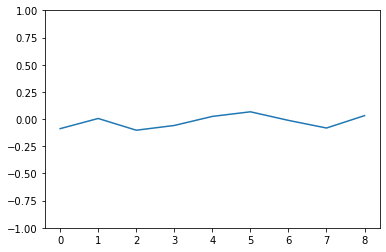

In [6]:
means = []

plt.ylim(-1,1)
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
    
plt.plot(means , scaley=False)

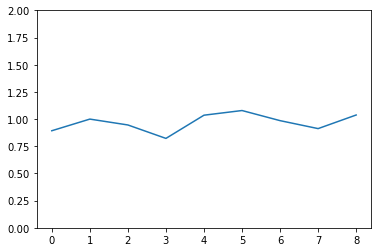

In [7]:
vars = []

plt.ylim(0,2)
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
    
plt.plot(vars)

###  LinearRegression
### 普通線性回歸

-  model.coef_ # 可查看係數
-  model.intercept_ # 可查看截距值

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain , Ytrain)

LinearRegression()

In [9]:
# Y = W.X + c
model.coef_.dot(Xtest[10,:]) + model.intercept_

3845.2528539487685

In [10]:
model.predict(Xtest[10,:].reshape(1,-1))

array([3845.25285395])

In [11]:
# rfecv.support_  #保留排名
# rfecv.ranking_  #重要度排名
# model.coef_ # 可查看係數
# model.intercept_ # 可查看截距值

### Recursive Feature Elimination (RFECV) 
### 遞歸特徵消除：特徵擷取

通過交叉驗證來找到最優的特徵數量。如果減少特徵會造成性能損失，那麼將不會去除任何特徵。這個方法用以選取單模型特徵相當不錯，但是有兩個缺陷，一，計算量大。二，隨著學習器（評估器）的改變，最佳特徵組合也會改變，有些時候會造成不利影響。

- 對要訓練的機器學習算法進行建模
- 確定在一次迭代中要消除的特徵數量。
- 由於 RFECV 是遞歸迭代的，我們需要強行停止它。

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

#特徵選取
model = LinearRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1) #每次去除特徵數  #最小特徵數
rfecv.fit(Xtrain , Ytrain)
model.fit(Xtrain , Ytrain)

LinearRegression()

In [13]:
selected_features = np.where(rfecv.support_)[0]
selected_features

Xtrain = Xtrain[:,selected_features]
Xtrain
# Xtest = Xtest[:,selected_features]

array([[ 0.88398812,  1.07913383, -0.90431146, ..., -0.56799694,
        -0.62274236,  1.77860173],
       [ 0.88398812, -0.09652155, -0.08913601, ..., -0.56799694,
        -0.62274236,  1.77860173],
       [-1.44174174,  0.58927742, -0.90431146, ..., -0.56799694,
        -0.62274236,  1.77860173],
       ...,
       [-0.9484051 , -0.21082138, -0.90431146, ..., -0.56799694,
        -0.62274236, -0.56223942],
       [-1.08935843,  0.4096634 , -0.90431146, ...,  1.76057288,
        -0.62274236, -0.56223942],
       [ 1.44780141,  0.32802067, -0.90431146, ..., -0.56799694,
        -0.62274236,  1.77860173]])

In [14]:
# Y = W.X + c
model.coef_.dot(Xtest[10,:]) + model.intercept_

3845.2528539487685

In [15]:
model.predict(Xtest[10,:].reshape(1,-1))

array([3845.25285395])